<a href="https://colab.research.google.com/github/ElsiSahayaRenita/Energy-Efficiency-Industrial-Automation-/blob/main/Energy_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [32]:
data = pd.read_csv('/content/ENB2012.csv')

In [33]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [34]:
#Finding sum of null values
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

### There is no null value in the given data

### Renaming the Attribute to make effective in analysis

In [35]:
df=data.rename(columns={"X1": "Relative_Compactness", "X2": "Surface_Area","X3": "Wall_Area","X4": "Roof_Area","X5": "Overall_Height","X6": "Orientation","X7": "Glazing_Area","X8": "Glazing_Area_Distribution","Y1": "Heating_Load","Y2":"Cooling_Load"})
df.head() 

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


# **Exploratory Data Analysis - EDA**

In [37]:
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [38]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Text(0.5, 1.0, 'Relative compactness')

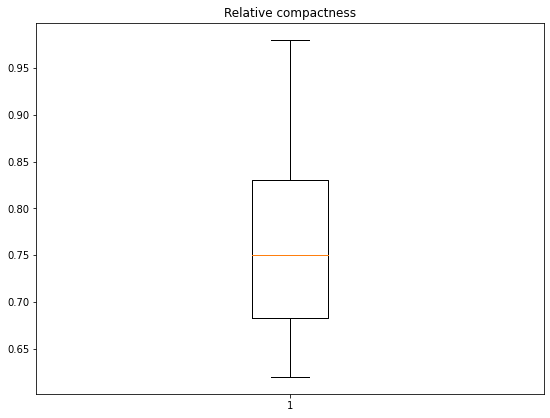

In [39]:
plt.figure(figsize = (20, 15))

ax = plt.subplot(224)
plt.boxplot(df.Relative_Compactness)
ax.set_title('Relative compactness')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


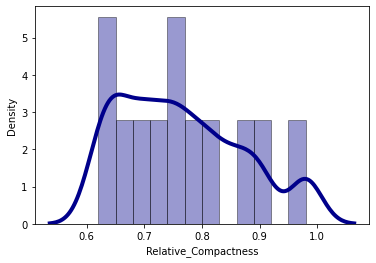

In [40]:
sns.distplot(df['Relative_Compactness'], hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

### **Inference:**
    1. Compactness is defined as the amount of solid substance filled in the material.
    2. Average Relative Compactness in the given data is 0.75.
    3. Distribution is Positively Skewed, also high when Relative Compactness is less than 0.8.


Text(0.5, 1.0, 'Surface Area')

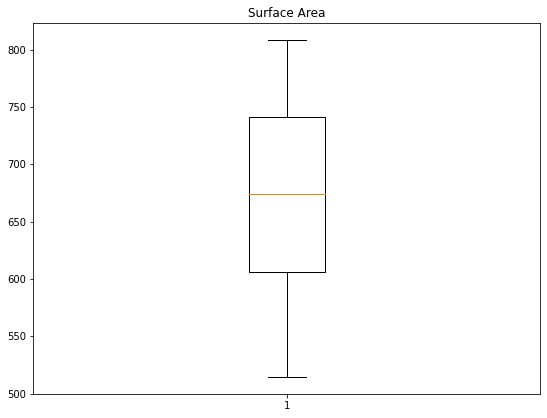

In [41]:
plt.figure(figsize = (20, 15))

ax = plt.subplot(223)
plt.boxplot(df.Surface_Area)
ax.set_title('Surface Area')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


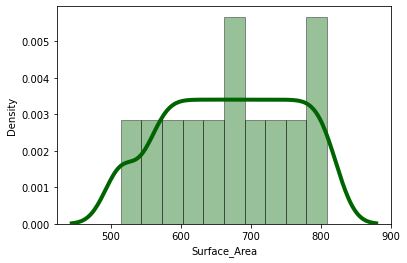

In [42]:
sns.distplot(df['Surface_Area'], hist=True, kde=True, 
              color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### **Inference:**
    1. Surface Area is used in covering building exteriors and in designing interiors
    2. Average Surface Area of buidings in the given data is about 675 SquareFeet.
    3. Distribution is Negatively Skewed and stays neutral when Surface Area is between 600 to 800 SquareFeet.

Text(0.5, 1.0, 'Wall Area')

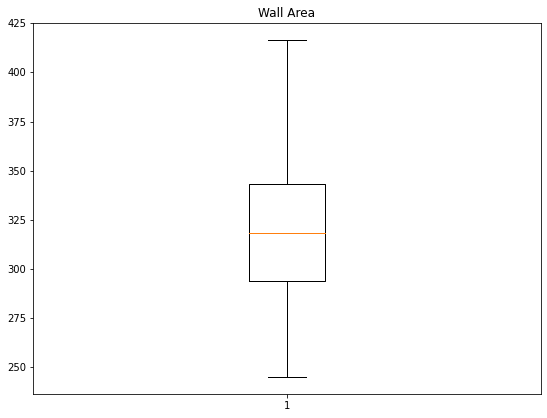

In [43]:
plt.figure(figsize = (20, 15))

ax = plt.subplot(221)
plt.boxplot(df.Wall_Area)
ax.set_title('Wall Area')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


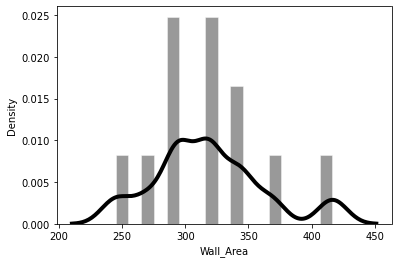

In [44]:
sns.distplot(df['Wall_Area'], hist=True, kde=True, 
              color = 'black', 
             hist_kws={'edgecolor':'white'},
             kde_kws={'linewidth': 4})


### **Inference:**
    1. Wall Area is generally refers to the area occupied by floor in respective with any floor level.
    2. Average Wall Area in the given data is around 320 SquareFeet.
    3. Distribution is Skewed Right i.e Positively Skewed.

Text(0.5, 1.0, 'Roof Area')

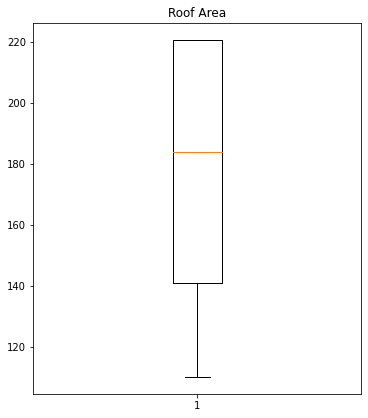

In [45]:
plt.figure(figsize = (20, 15))

ax = plt.subplot(232)
plt.boxplot(df.Roof_Area)
ax.set_title('Roof Area')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


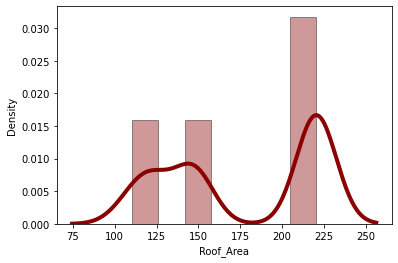

In [46]:
sns.distplot(df['Roof_Area'], hist=True, kde=True, 
              color = 'darkred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### **Inference:**
     1. Roof Area is the area of upper most portion of the building which protects the building from rain, wind and sun.
     2. Asymmetrical Distribution where the upper quartile or third quartile Q3 were equal to maximun thus upper whisker is absent.
     3. Roof Area will be 220 SquareFeet.

Text(0.5, 1.0, 'Overall Height')

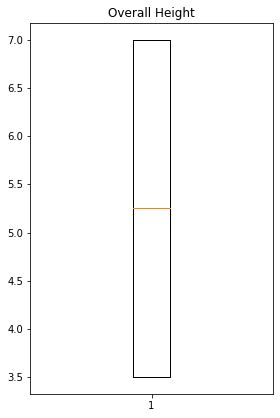

In [47]:
plt.figure(figsize = (20, 15))

ax = plt.subplot(241)
plt.boxplot(df.Overall_Height)
ax.set_title('Overall Height')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


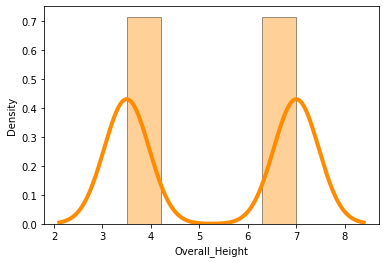

In [48]:
sns.distplot(df['Overall_Height'], hist=True, kde=True, 
              color = 'darkorange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### **Inference:**
    1. Overall Height is the total height of the buiding from the ground level generally will be in the units Feet.
    2. Distribution is Symmetrical, while the lower quartile or first quartile Q1 is equal to the minimum and the upper quartile or third quartile Q3 is equal to the maximum thus both whiskers were absent.
    3. Thus the minimum overall height of the building is 3.5Feet and the maximum overall height of the building is 7Feet.

Text(0.5, 1.0, 'Orientation')

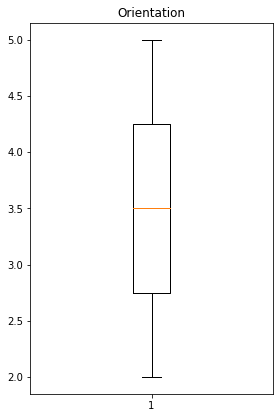

In [49]:
plt.figure(figsize = (20, 15))

ax = plt.subplot(242)
plt.boxplot(df.Orientation)
ax.set_title('Orientation')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


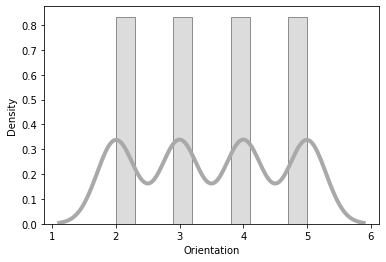

In [50]:
sns.distplot(df['Orientation'], hist=True, kde=True, 
              color = 'darkgrey', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### **Inference:**
    1. Orientation is the way of building positioned with respect to its surroundings irrespective to the axis.
    2. Distribution is Symmetrical.
    3. Median Orientation number is 3.5.
    


Text(0.5, 1.0, 'Glazing Area')

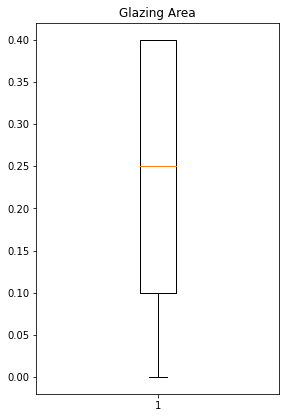

In [51]:
plt.figure(figsize = (20, 15))

ax = plt.subplot(243)
plt.boxplot(df.Glazing_Area)
ax.set_title('Glazing Area')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


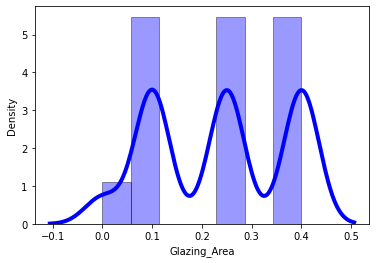

In [52]:

sns.distplot(df['Glazing_Area'], hist=True, kde=True, 
              color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### **Inference:**
    1. The area of a glazing assembly is the interior surface area of the entire assembly.
    2. Distribution is Asymmetrical in which the upper quartile is equal to maximum.
    3. Maximum Glazing Area is 0.40.

Text(0.5, 1.0, 'Glazing Area Distribution')

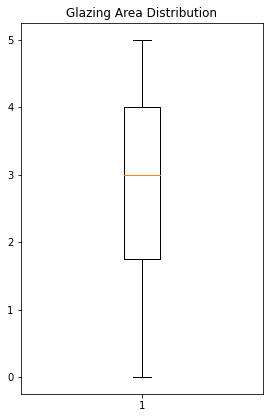

In [53]:
plt.figure(figsize = (20, 15))

ax = plt.subplot(242)
plt.boxplot(df.Glazing_Area_Distribution)
ax.set_title('Glazing Area Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


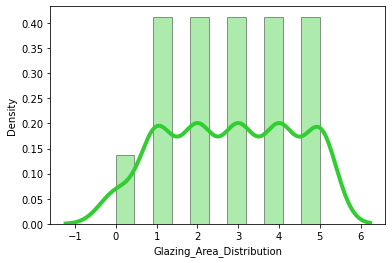

In [54]:
sns.distplot(df['Glazing_Area_Distribution'], hist=True, kde=True, 
              color = 'limegreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### **Inference:**
    1. Distribution is Negatively Skewed also called as Left Skewed.
    2. Median Glazing Area Distribution is about 3 for the given dataset. 

Text(0.5, 1.0, 'Heating Load')

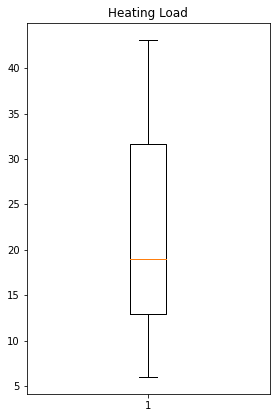

In [55]:
plt.figure(figsize = (20, 15))

ax = plt.subplot(242)
plt.boxplot(df.Heating_Load)
ax.set_title('Heating Load')

### **Inference:**
    1. Distribution for Heating Load is Positively Skewed also known as Right Skewed. 

Text(0.5, 1.0, 'Cooling Load')

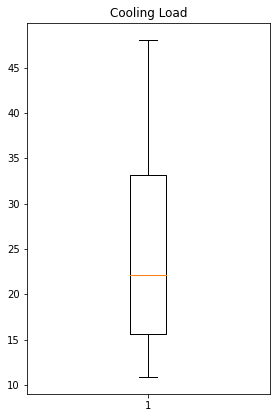

In [56]:
plt.figure(figsize = (20, 15))

ax = plt.subplot(242)
plt.boxplot(df.Cooling_Load)
ax.set_title('Cooling Load')

### **Inference:**
     1. Distribution for Cooling Load is Positively Skewed.

# **Inference for given dataset:**
     1. From the above plots, most of the features have a positive skew except for a few and 'Orientation' and 'Overall_Height' have quite symetrical distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


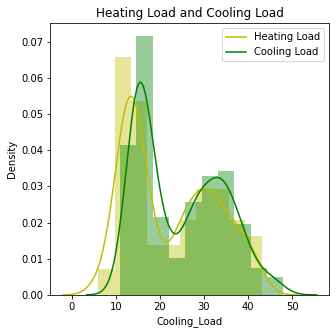

In [90]:
# Visualizing the distribution of both target values
plt.figure(figsize=(5,5))
sns.distplot((df.Heating_Load), hist=True, kde=True, 
               color = 'Y')
sns.distplot((df.Cooling_Load), hist=True, kde=True, 
                color = 'G')
plt.title('Heating Load and Cooling Load')
plt.legend(['Heating Load','Cooling Load'])

### **Inference:**
        For both Heating Load and Cooling Load most of datas are ranges between 10 to 20.

# **Correlation**

In [58]:
 df.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing_Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing_Area_Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


Text(0.5, 1.0, 'CORRELATION MATRIX - HEATMAP')

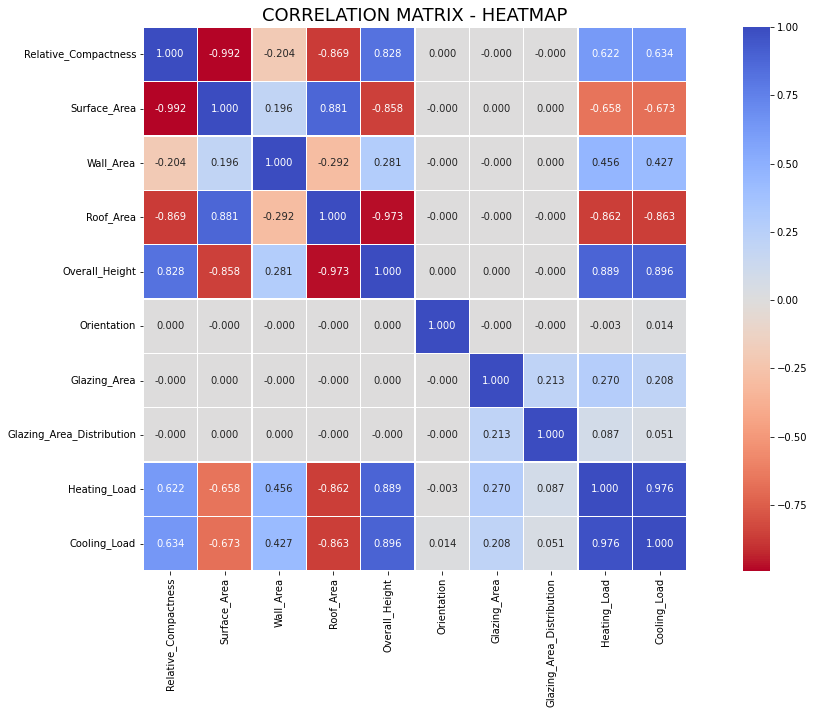

In [59]:
f,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), cbar = True,  square = True, annot = True, fmt= '0.3f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm_r", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18)

## **Inference:**
     1. Overall Height has the highest correlation with both Heating Load and Cooling Load.
     2. Surface Area and Roof Area has negative correlation with Heating Load and Cooling Load.
     3. Orientation has low correlation attribute.
     4. High Correlation is obtained between Overall Height-Relative Compactness=0.828, Surface Area-Roof Area = 0.881, Overall Height-Cooling Load=0.896, Overall Height-Heating Load=0.889.   

# **Machine Learning**

## Spliting the data into train and test sets

In [60]:
x = df.drop(columns=['Heating_Load','Cooling_Load'])
y1 = df['Heating_Load']
y2 = df['Cooling_Load']

In [61]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.33, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.33, random_state=24)

# **Random Forest Regressor**

### Feature Selection Using RFE

In [62]:
#Feature selection for y1 Heating_Load
rr = RandomForestRegressor()
rfe = RFE(rr)
fit = rfe.fit(x,y1)
print("Feature Selection for Heating Load:")
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Feature Selection for Heating Load:
Num Features: 4
Selected Features: [ True  True False  True  True False False False]
Feature Ranking: [1 1 3 1 1 5 2 4]


Top **4** Features for predicting **Heating Load** by using Recursive Feature Elimination are:

1. Relative_Compactness	
2. Surface_Area	
3. Roof_Area
4. Glazing_Area




In [63]:
#Feature selection for y2 Cooling_Load 
rr = RandomForestRegressor()
rfe = RFE(rr)
fit = rfe.fit(x,y2)
print("Feature Selection for Cooling Load:")
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Feature Selection for Cooling Load:
Num Features: 4
Selected Features: [ True  True False False  True False  True False]
Feature Ranking: [1 1 3 2 1 5 1 4]


Top **4** Features for predicting **Cooling Load** by using Recursive Feature Elimination are:

1. Relative_Compactness
2. Surface_Area
3. Roof_Area
4. Overall_Height

In [64]:
rf_hot =RandomForestRegressor()
rf_cold =RandomForestRegressor()

In [65]:
rf_hot.fit(x1_train,y1_train) #target as Heating Load
rf_cold.fit(x2_train,y2_train) #target as Cooling load

y1_pre = rf_hot.predict(x1_test)
y2_pre = rf_cold.predict(x2_test)


In [66]:
#Heating Load 
print('Mean Absolute Error for Heating Load:', metrics.mean_absolute_error(y1_test, y1_pre))
print('Mean Squared Error for Heating Load:', metrics.mean_squared_error(y1_test, y1_pre))
print(' Root Mean Squared Error for Heating Load:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pre)))
print('Random Forest Regressor Model score for Heating Load :', cross_val_score(rf_hot, x, y1, cv=10, scoring = "r2").mean()*100)

Mean Absolute Error for Heating Load: 0.33662007874015654
Mean Squared Error for Heating Load: 0.23064497177165263
 Root Mean Squared Error for Heating Load: 0.4802551111353763
Random Forest Regressor Model score for Heating Load : 96.91029498687898


In [67]:
#Cooling Load 
print('Mean Absolute Error for Heating Load:', metrics.mean_absolute_error(y2_test, y2_pre))
print('Mean Squared Error for Heating Load:', metrics.mean_squared_error(y2_test, y2_pre))
print(' Root Mean Squared Error for Heating Load:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pre)))
print('Random Forest Regressor Model score for Cooling Load :', cross_val_score(rf_cold, x, y2, cv=10, scoring = "r2").mean()*100)

Mean Absolute Error for Heating Load: 1.1994374015748033
Mean Squared Error for Heating Load: 4.0344968855511905
 Root Mean Squared Error for Heating Load: 2.0086057068402425
Random Forest Regressor Model score for Cooling Load : 96.4484174904762


# **Inference:**
    1.  All the Errors for Heating Load is very small which is less than 0.5.
    2. Random Forest Regressor Model score for Heating Load is 97% which is perfect score.

# **Linear Regression**

In [68]:
lr_hot = LinearRegression() 
lr_cold = LinearRegression()

In [69]:
lr_hot.fit(x1_train,y1_train)#target as Heating Load
lr_cold.fit(x2_train,y2_train)#target as Cooling Load

y1_pred = lr_hot.predict(x1_test)
y2_pred = lr_cold.predict(x2_test)


In [70]:
#Heating Load 
print('Mean Absolute Error for Heating Load:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error for Heating Load:', metrics.mean_squared_error(y1_test, y1_pred))
print(' Root Mean Squared Error for Heating Load:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('Linear Regression Model score for Heating Load :', cross_val_score(lr_hot, x, y1, cv=10, scoring = "r2").mean()*100)

Mean Absolute Error for Heating Load: 2.1386637194398155
Mean Squared Error for Heating Load: 8.768945176836622
 Root Mean Squared Error for Heating Load: 2.9612404793999123
Linear Regression Model score for Heating Load : 89.2268769719592


In [71]:
#Cooling Load
print('Mean Absolute Error for Cooling Load:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error for Cooling Load:', metrics.mean_squared_error(y2_test, y2_pred))
print(' Root Mean Squared Error for Cooling Load:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print('Linear Regression Model score for Cooling Load :', cross_val_score(lr_cold, x, y2, cv=10, scoring = "r2").mean()*100)

Mean Absolute Error for Cooling Load: 2.3885377158010654
Mean Squared Error for Cooling Load: 11.049369986793232
 Root Mean Squared Error for Cooling Load: 3.324059263429765
Linear Regression Model score for Cooling Load : 87.62156243624281


# **Inference:**
    1. Linear Regression Score for Heating Load is slightly high when compared to Cooling Load.
    2. Also Errors are high for Cooling Load.

# **Decison Tree Regressor**

In [72]:
df_hot = DecisionTreeRegressor()
df_cold= DecisionTreeRegressor()

In [73]:
df_hot.fit(x1_train,y1_train)#target as Heating Load
df_cold.fit(x2_train,y2_train)#target as Cooling Load

y1_predict = df_hot.predict(x1_test)
y2_predict = df_cold.predict(x2_test)


In [74]:
#Heating Load 
print('Mean Absolute Error for Heating Load:', metrics.mean_absolute_error(y1_test, y1_predict))
print('Mean Squared Error for Heating Load:', metrics.mean_squared_error(y1_test, y1_predict))
print(' Root Mean Squared Error for Heating Load:', np.sqrt(metrics.mean_squared_error(y1_test, y1_predict)))
print('Decison Forest Regressor Model score for Heating Load :', cross_val_score(df_hot, x, y1, cv=10, scoring = "r2").mean()*100)

Mean Absolute Error for Heating Load: 0.40173228346456713
Mean Squared Error for Heating Load: 0.3455188976377955
 Root Mean Squared Error for Heating Load: 0.5878085552608056
Decison Forest Regressor Model score for Heating Load : 96.87168924085643


In [75]:
#Cooling Load
print('Mean Absolute Error for Cooling Load:', metrics.mean_absolute_error(y2_test, y2_predict))
print('Mean Squared Error for Cooling Load:', metrics.mean_squared_error(y2_test, y2_predict))
print(' Root Mean Squared Error for Cooling Load:', np.sqrt(metrics.mean_squared_error(y2_test, y2_predict)))
print('Decison Forest Regressor Model score for Cooling Load :', cross_val_score(df_cold, x, y2, cv=10, scoring = "r2").mean()*100)

Mean Absolute Error for Cooling Load: 1.3669291338582676
Mean Squared Error for Cooling Load: 6.853196850393701
 Root Mean Squared Error for Cooling Load: 2.617861121296105
Decison Forest Regressor Model score for Cooling Load : 95.54572594942634


## **Inference:**
     1. Decision Forest Regressor Score for both Heating and Cooling Load is more than 95%.

# **K Nearest Neighbors**

In [76]:
kn_hot = KNeighborsRegressor()
kn_cold = KNeighborsRegressor()

In [77]:
kn_hot.fit(x1_train,y1_train)#target as Heating Load
kn_cold.fit(x2_train,y2_train)#target as Cooling Load

y1_pr = kn_hot.predict(x1_test)
y2_pr = kn_cold.predict(x2_test)


In [78]:
#Heating Load 
print('Mean Absolute Error for Heating Load:', metrics.mean_absolute_error(y1_test, y1_pr))
print('Mean Squared Error for Heating Load:', metrics.mean_squared_error(y1_test, y1_pr))
print(' Root Mean Squared Error for Heating Load:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pr)))
print('K Nearest Neighbors Regressor Model score for Heating Load :', cross_val_score(kn_hot, x, y1, cv=10, scoring = "r2").mean()*100)

Mean Absolute Error for Heating Load: 1.7531653543307086
Mean Squared Error for Heating Load: 6.120974929133857
 Root Mean Squared Error for Heating Load: 2.4740604133961357
K Nearest Neighbors Regressor Model score for Heating Load : 88.40399080049018


In [79]:
#Cooling Load
print('Mean Absolute Error for Cooling Load:', metrics.mean_absolute_error(y2_test, y2_pr))
print('Mean Squared Error for Cooling Load:', metrics.mean_squared_error(y2_test, y2_pr))
print(' Root Mean Squared Error for Cooling Load:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pr)))
print('Decison Forest Regressor Model score for Cooling Load :', cross_val_score(kn_cold, x, y2, cv=10, scoring = "r2").mean()*100)

Mean Absolute Error for Cooling Load: 1.561700787401575
Mean Squared Error for Cooling Load: 4.2796939212598435
 Root Mean Squared Error for Cooling Load: 2.0687421108634694
Decison Forest Regressor Model score for Cooling Load : 92.47214986139231


## **Inference:**
    1. K Nearest Neighbors Score for Cooling Load is Higher than Heating Load. 

# **Ridge Regression**

In [80]:
r_hot =Ridge()
r_cold = Ridge()

In [81]:
r_hot.fit(x1_train,y1_train)#target as Heating Load
r_cold.fit(x2_train,y2_train)#target as Cooling Load

y1pr  = r_hot.predict(x1_test)
y2pr  = r_cold.predict(x2_test)

In [82]:
#Heating Load 
print('Mean Absolute Error for Heating Load:', metrics.mean_absolute_error(y1_test, y1pr))
print('Mean Squared Error for Heating Load:', metrics.mean_squared_error(y1_test, y1pr))
print(' Root Mean Squared Error for Heating Load:', np.sqrt(metrics.mean_squared_error(y1_test, y1pr)))
print('Ridge Regression Model score for Heating Load :', cross_val_score(r_hot, x, y1, cv=10, scoring = "r2").mean()*100)

Mean Absolute Error for Heating Load: 2.248748788082819
Mean Squared Error for Heating Load: 9.279562109840743
 Root Mean Squared Error for Heating Load: 3.046237369254199
Ridge Regression Model score for Heating Load : 88.88975389620943


In [83]:
#Cooling Load
print('Mean Absolute Error for Cooling Load:', metrics.mean_absolute_error(y2_test, y2pr))
print('Mean Squared Error for Cooling Load:', metrics.mean_squared_error(y2_test, y2pr))
print(' Root Mean Squared Error for Cooling Load:', np.sqrt(metrics.mean_squared_error(y2_test, y2pr)))
print('Ridge Regression Model score for Cooling Load :', cross_val_score(r_cold, x, y2, cv=10, scoring = "r2").mean()*100)

Mean Absolute Error for Cooling Load: 2.488180461493771
Mean Squared Error for Cooling Load: 11.566695112541526
 Root Mean Squared Error for Cooling Load: 3.400984432857864
Ridge Regression Model score for Cooling Load : 87.04319622723325


## **Inference:**
    1. Ridge Regression Score for Heating and Cooling Load is almost more than and equal to 87%.

# **Lasso Regression**

In [84]:
l_hot = Lasso()
l_cold = Lasso() 

In [85]:
l_hot.fit(x1_train,y1_train)#target as Heating Load
l_cold.fit(x2_train,y2_train)#target as Cooling Load

y1pred = l_hot.predict(x1_test)
y2pred = l_cold.predict(x2_test)


In [86]:
#Heating Load 
print('Mean Absolute Error for Heating Load:', metrics.mean_absolute_error(y1_test, y1pred))
print('Mean Squared Error for Heating Load:', metrics.mean_squared_error(y1_test, y1pred))
print(' Root Mean Squared Error for Heating Load:', np.sqrt(metrics.mean_squared_error(y1_test, y1pred)))
print('Lasso Regression Model score for Heating Load :', cross_val_score(l_hot, x, y1, cv=10, scoring = "r2").mean()*100)

Mean Absolute Error for Heating Load: 3.3817047336052592
Mean Squared Error for Heating Load: 21.715988989409148
 Root Mean Squared Error for Heating Load: 4.660041736874161
Lasso Regression Model score for Heating Load : 73.97503737484207


In [87]:
#Cooling Load
print('Mean Absolute Error for Cooling Load:', metrics.mean_absolute_error(y2_test, y2pred))
print('Mean Squared Error for Cooling Load:', metrics.mean_squared_error(y2_test, y2pred))
print(' Root Mean Squared Error for Cooling Load:', np.sqrt(metrics.mean_squared_error(y2_test, y2pred)))
print('Lasso Regression Model score for Cooling Load :', cross_val_score(l_cold, x, y2, cv=10, scoring = "r2").mean()*100)

Mean Absolute Error for Cooling Load: 3.3152147638420595
Mean Squared Error for Cooling Load: 21.011552643129765
 Root Mean Squared Error for Cooling Load: 4.583836018350762
Lasso Regression Model score for Cooling Load : 75.17537476543488


## **Inference:**
     1. Lasso Regression Score has the lowest score for both Heating and Cooling Load compared to other model score.

# **Best Model Score:**

In [88]:
#Heating Load
print("Best Model for Heating Load:")
print('Random Forest Regressor Model score for Heating Load :', cross_val_score(rf_hot, x, y1, cv=10, scoring = "r2").mean()*100)
print('Decison Forest Regressor Model score for Heating Load :', cross_val_score(df_hot, x, y1, cv=10, scoring = "r2").mean()*100)
print('Linear Regression Model score for Heating Load :', cross_val_score(lr_hot, x, y1, cv=10, scoring = "r2").mean()*100)
print('Ridge Regression Model score for Heating Load :', cross_val_score(r_hot, x, y1, cv=10, scoring = "r2").mean()*100)
print('K Nearest Neighbors Regressor Model score for Heating Load :', cross_val_score(kn_hot, x, y1, cv=10, scoring = "r2").mean()*100)
print('Lasso Regression Model score for Heating Load :', cross_val_score(l_hot, x, y1, cv=10, scoring = "r2").mean()*100)

Best Model for Heating Load:
Random Forest Regressor Model score for Heating Load : 96.91794883110644
Decison Forest Regressor Model score for Heating Load : 96.87168924085643
Linear Regression Model score for Heating Load : 89.2268769719592
Ridge Regression Model score for Heating Load : 88.88975389620943
K Nearest Neighbors Regressor Model score for Heating Load : 88.40399080049018
Lasso Regression Model score for Heating Load : 73.97503737484207


# **Inference Best Model For Heating Load:**

         

*   Random Forest Regressor (96.9% ~ 97%)

*   Decision Tree Regressor (96.8%)



In [89]:
#Cooling Load

print("Best Model for Cooling Load:")
print('Random Forest Regressor Model score for Cooling Load :', cross_val_score(rf_cold, x, y2, cv=10, scoring = "r2").mean()*100)
print('Decison Forest Regressor Model score for Cooling Load :', cross_val_score(df_cold, x, y2, cv=10, scoring = "r2").mean()*100)
print('K Nearest Neighbors Regressor Model score for Cooling Load :', cross_val_score(kn_cold, x, y2, cv=10, scoring = "r2").mean()*100)
print('Linear Regression Model score for Cooling Load :', cross_val_score(lr_cold, x, y2, cv=10, scoring = "r2").mean()*100)
print('Ridge Regression Model score for Cooling Load :', cross_val_score(r_cold, x, y2, cv=10, scoring = "r2").mean()*100)
print('Lasso Regression Model score for Cooling Load :', cross_val_score(l_cold, x, y2, cv=10, scoring = "r2").mean()*100)

Best Model for Cooling Load:
Random Forest Regressor Model score for Cooling Load : 96.51599254825562
Decison Forest Regressor Model score for Cooling Load : 95.4563189715352
K Nearest Neighbors Regressor Model score for Cooling Load : 92.47214986139231
Linear Regression Model score for Cooling Load : 87.62156243624281
Ridge Regression Model score for Cooling Load : 87.04319622723325
Lasso Regression Model score for Cooling Load : 75.17537476543488


# **Inference Best model For Cooling Load:**



*   Random Forest Regressor (96.4%)

*   Decision Tree Regressor (95.5%)

*   K Nearest Neighbor Regressor (92.4%)



